In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
import pickle
import math
import imblearn

## APKs_Combined_Processed_csv

In [2]:
vulnerability_df = pd.read_pickle("D:\\PhD\\Model_Building\\Stage_6_ML_Model_Training\\Version_3.0\\proccessed_dataset_for_analysis.pickle")  

In [3]:
vulnerability_df.head()

,Code,processed_code,Vulnerability_status,CWE_ID
0,package org.ksoap2.samples.amazon;,package org.ksoap2.samples.amazon;,0,
1,,,0,
2,import allahabadbank.albumbrella.BuildConfig;,import allahabadbank.albumbrella.BuildConfig;,0,
3,import java.util.Vector;,import java.util.Vector;,0,
4,import javax.microedition.lcdui.Command;,import javax.microedition.lcdui.Command;,0,


### Binary Classification

In [4]:
vulnerability_df.Vulnerability_status.value_counts()

0    15279029
1      191949
Name: Vulnerability_status, dtype: int64

In [5]:
c_0 = vulnerability_df[vulnerability_df.Vulnerability_status == 0]
c_1 = vulnerability_df[vulnerability_df.Vulnerability_status == 1]

In [6]:
c_0_count = c_0.processed_code.count()
c_1_count = c_1.processed_code.count()

min_count = 0

if(c_0_count<=c_1_count):
    min_count = c_0_count
else:
    min_count = c_1_count

i = (math.ceil(min_count / 1000) * 1000)-1000
print(min_count,i)

191949 191000


In [7]:
df_0 = c_0.sample(i)
df_1 = c_1.sample(i)

vulnerability_df = pd.concat([df_0, df_1], ignore_index=True)

In [8]:
vulnerability_df.Vulnerability_status.value_counts()

0    191000
1    191000
Name: Vulnerability_status, dtype: int64

In [9]:
code_list = vulnerability_df.processed_code.tolist()
y = vulnerability_df.Vulnerability_status

sentences = code_list
y = y.values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1)
vectorizer = CountVectorizer(analyzer = 'word', lowercase=True, max_df=0.80, min_df=100, ngram_range=(1,3))
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

print(len(vectorizer.vocabulary_))

2135


              precision    recall  f1-score   support

           0       0.89      0.94      0.91     47689
           1       0.94      0.88      0.91     47811

    accuracy                           0.91     95500
   macro avg       0.91      0.91      0.91     95500
weighted avg       0.91      0.91      0.91     95500



<AxesSubplot:>

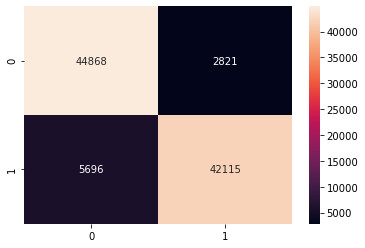

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_model = nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, nb_predictions)
print(classification_report(y_test, nb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

C:\Users\janak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     47689
           1       0.97      0.91      0.94     47811

    accuracy                           0.94     95500
   macro avg       0.94      0.94      0.94     95500
weighted avg       0.94      0.94      0.94     95500



<AxesSubplot:>

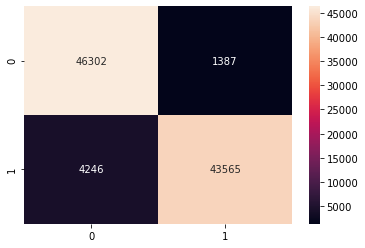

In [12]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_model = lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test, lr_predictions)
print(classification_report(y_test, lr_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     47689
           1       0.97      0.91      0.94     47811

    accuracy                           0.94     95500
   macro avg       0.94      0.94      0.94     95500
weighted avg       0.94      0.94      0.94     95500



<AxesSubplot:>

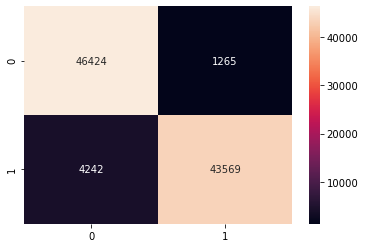

In [13]:
xgb_classifier = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss')
xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, xgb_predictions)
print(classification_report(y_test, xgb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     47689
           1       0.94      0.89      0.91     47811

    accuracy                           0.91     95500
   macro avg       0.92      0.91      0.91     95500
weighted avg       0.92      0.91      0.91     95500



<AxesSubplot:>

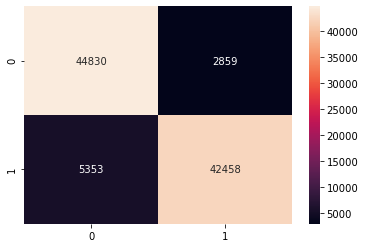

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_model = gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
cm = confusion_matrix(y_test, gb_predictions)
print(classification_report(y_test, gb_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     47689
           1       0.96      0.94      0.95     47811

    accuracy                           0.95     95500
   macro avg       0.95      0.95      0.95     95500
weighted avg       0.95      0.95      0.95     95500



<AxesSubplot:>

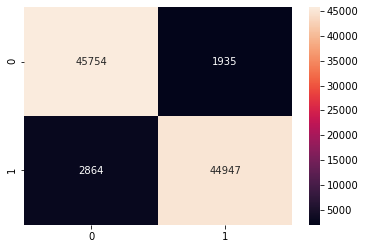

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_model = rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
print(classification_report(y_test, rf_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     47689
           1       0.97      0.88      0.92     47811

    accuracy                           0.93     95500
   macro avg       0.93      0.93      0.93     95500
weighted avg       0.93      0.93      0.93     95500



<AxesSubplot:>

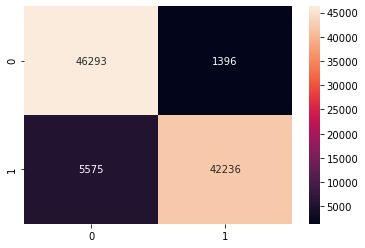

In [16]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(alpha=1, max_iter=100)
mlp_model = MLP_classifier.fit(X_train, y_train)
mlp_predictions = MLP_classifier.predict(X_test)
cm = confusion_matrix(y_test, mlp_predictions)
print(classification_report(y_test, mlp_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     47689
           1       0.86      0.95      0.90     47811

    accuracy                           0.89     95500
   macro avg       0.90      0.89      0.89     95500
weighted avg       0.90      0.89      0.89     95500



<AxesSubplot:>

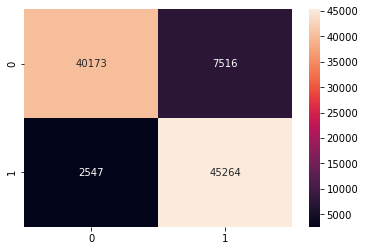

In [17]:
from sklearn.svm import SVC
SVC_classifier = SVC(gamma=2, C=1)
svc_model = SVC_classifier.fit(X_train, y_train)
svc_predictions = SVC_classifier.predict(X_test)
cm = confusion_matrix(y_test, svc_predictions)
print(classification_report(y_test, svc_predictions))
sn.heatmap(cm, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     47689
           1       0.95      0.94      0.94     47811

    accuracy                           0.94     95500
   macro avg       0.94      0.94      0.94     95500
weighted avg       0.94      0.94      0.94     95500



<AxesSubplot:>

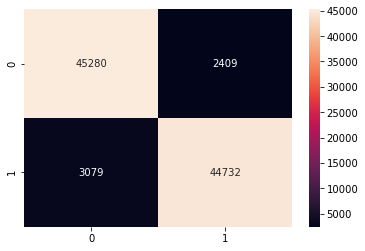

In [18]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_model = dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, dt_predictions)
print(classification_report(y_test, dt_predictions))
sn.heatmap(cm, annot=True, fmt='g')

In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('nb', nb_classifier),
    ('lr', lr_classifier),
    ('xgb', xgb_classifier),
    ('gb', gb_classifier),
    ('rf', rf_classifier),
    ('mlp', MLP_classifier),
    ('svc', SVC_classifier),
    ('dt', dt_classifier)
    
]

stack_model = StackingClassifier(
    estimators =estimator_list, final_estimator = LogisticRegression())

C:\Users\janak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     47689
           1       0.96      0.94      0.95     47811

    accuracy                           0.95     95500
   macro avg       0.95      0.95      0.95     95500
weighted avg       0.95      0.95      0.95     95500



<AxesSubplot:>

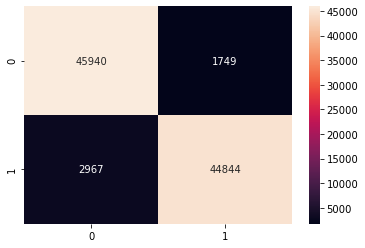

In [20]:
stack_model_new = stack_model.fit(X_train, y_train)
stack_predictions = stack_model_new.predict(X_test)
cm = confusion_matrix(y_test, stack_predictions)
print(classification_report(y_test, stack_predictions))
sn.heatmap(cm, annot=True, fmt='g')

In [22]:
with open("binary_model.pickle", 'wb') as fout:
    pickle.dump((vectorizer, stack_model_new, stack_model), fout)